
# Customer Spending Regression Analysis

This notebook covers **Regression Analysis**.  
The goal is to analyze customer spending behavior and build a regression model step by step.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.1. Reading the data and doing exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). And performing Univariate and Bivariate Analysis.



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cubic_zirconia.csv')

In [5]:
#data=pd.read_csv(r'E:\data Science\Documents created\Great Lakes\Predictive modelling\Project\cubic_zirconia.csv')
data.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [6]:
data=data.iloc[:,1:]
data.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


The number columns has been removed as we already have it in the form of row labels



In [7]:
data.duplicated().sum()

np.int64(34)

We can see that there are 34 Duplicate values, they will not provide much information about the variance, hence we can remoce them



In [8]:
data=data.drop_duplicates()

In [9]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [10]:
data.describe()

,carat,depth,table,x,y,z,price
count,26933.000000,26236.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,61.745285,57.455950,5.729346,5.733102,3.537769,3937.526120
std,0.477237,1.412243,2.232156,1.127367,1.165037,0.719964,4022.551862
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26236 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


We can see that depth column has near 700 null values, so we have to impute it to make the data suitable for machine learning, without null values.



In [12]:
data.shape

(26933, 10)

We can see that the data consists of 26967 rows and 10 columns, of which 3 are of object data type and 7 are numeric data types.



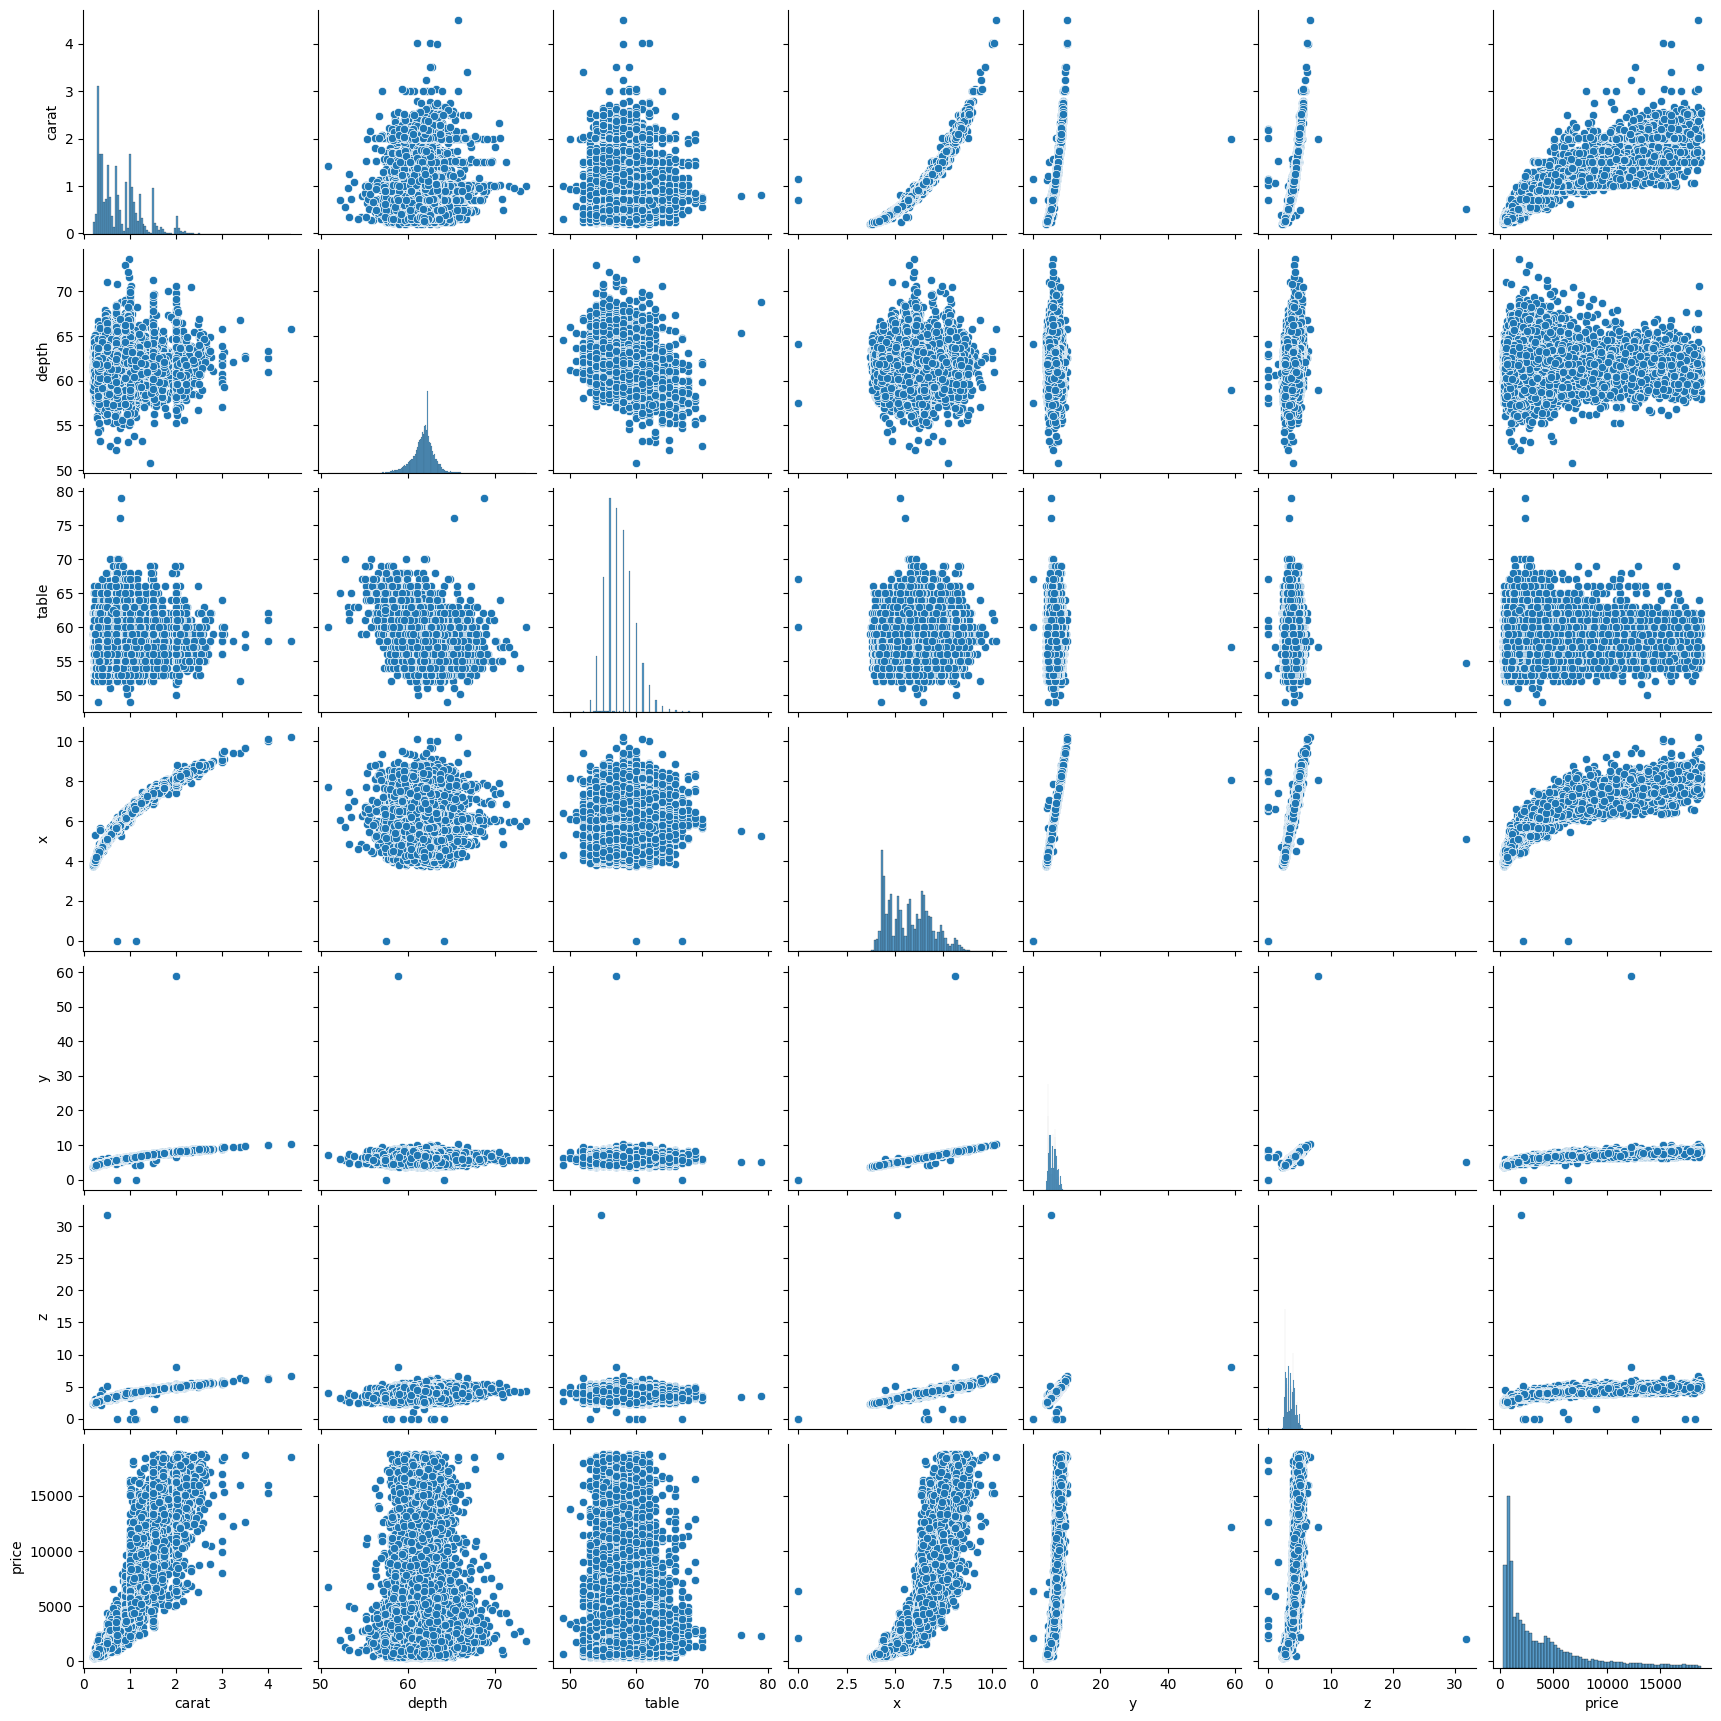

In [13]:
sns.pairplot(data[['carat','depth','table','x','y','z','price']]);

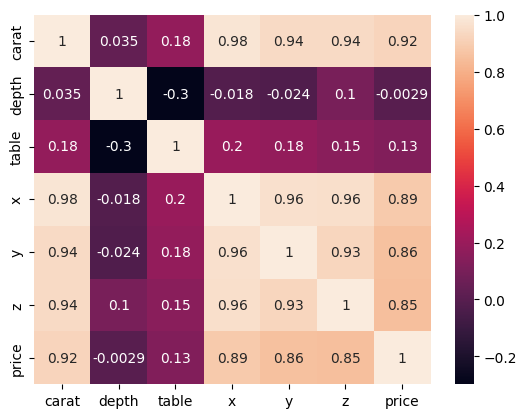

In [14]:
sns.heatmap(data[['carat','depth','table','x','y','z','price']].corr(),annot=True);

From the above pairplot and heat map, we can see that Price is most correlated with carat most with 0.92 correlation and then with Length, Width and Height in the order.

Also we can see that the price is correlated to a small extent with Width of Zircons table And almost no correlation with depth of cubic zirconia

Hence there is high Multi collinearity in the data present.



In [15]:
data_num=data[['carat','depth','table','x','y','z','price']]
data_num.head(5)

,carat,depth,table,x,y,z,price
0,0.30,62.1,58.0,4.27,4.29,2.66,499
1,0.33,60.8,58.0,4.42,4.46,2.70,984
2,0.90,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,60.4,59.0,4.35,4.43,2.65,779


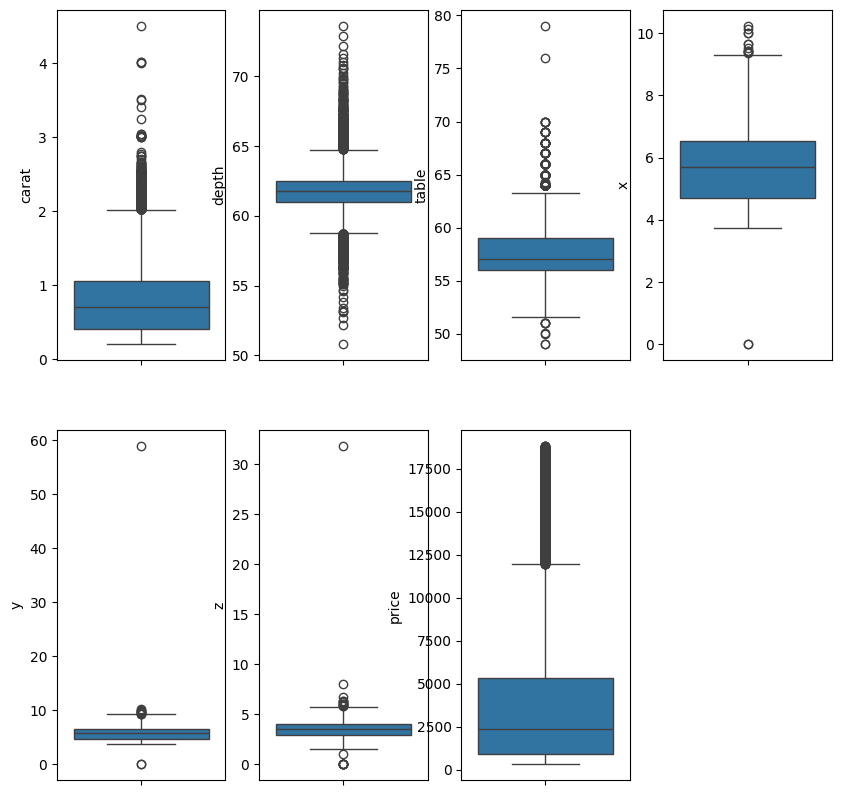

In [16]:
plt.figure(figsize=[10,10])
for i in range (data_num.shape[1]):
    plt.subplot(2,4,i+1)
    sns.boxplot(data_num.iloc[:,i]);

In [17]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3= col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range, upper_range

In [18]:
lrcarat,urcarat=remove_outlier(data_num['carat'])
data_num['carat']=np.where(data_num['carat']>urcarat,urcarat,data_num['carat'])
data_num['carat']=np.where(data_num['carat']<lrcarat,lrcarat,data_num['carat'])

lrtravel,urtravel=remove_outlier(data_num['depth'])
data_num['depth']=np.where(data_num['depth']>urtravel,urtravel,data_num['depth'])
data_num['depth']=np.where(data_num['depth']<lrtravel,lrtravel,data_num['depth'])

lrmiles,urmiles=remove_outlier(data_num['table'])
data_num['table']=np.where(data_num['table']>urmiles,urmiles,data_num['table'])
data_num['table']=np.where(data_num['table']<lrmiles,lrmiles,data_num['table'])

lrx,urx=remove_outlier(data_num['x'])
data_num['x']=np.where(data_num['x']>urx,urx,data_num['x'])
data_num['x']=np.where(data_num['x']<lrx,lrx,data_num['x'])

lrtravel,urtravel=remove_outlier(data_num['y'])
data_num['y']=np.where(data_num['y']>urtravel,urtravel,data_num['y'])
data_num['y']=np.where(data_num['y']<lrtravel,lrtravel,data_num['y'])

lrmiles,urmiles=remove_outlier(data_num['z'])
data_num['z']=np.where(data_num['z']>urmiles,urmiles,data_num['z'])
data_num['z']=np.where(data_num['z']<lrmiles,lrmiles,data_num['z'])

lrmiles,urmiles=remove_outlier(data_num['price'])
data_num['price']=np.where(data_num['price']>urmiles,urmiles,data_num['price'])
data_num['price']=np.where(data_num['price']<lrmiles,lrmiles,data_num['price'])

/tmp/ipython-input-1328120568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num['carat']=np.where(data_num['carat']>urcarat,urcarat,data_num['carat'])
/tmp/ipython-input-1328120568.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num['carat']=np.where(data_num['carat']<lrcarat,lrcarat,data_num['carat'])
/tmp/ipython-input-1328120568.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [19]:
data_num.head()

,carat,depth,table,x,y,z,price
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0


### 1.2 Imputing the null values if present, also checking for the values which are equal to zero. Checking if they have any meaning or do we need to change them or drop them. Checking for the possibility of combining the sub levels of a ordinal variables.



In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy ='mean')
imputer=imputer.fit(data[['depth']])
data_num['depth']=imputer.transform(data_num[['depth']])
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26933 entries, 0 to 26966
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   26933 non-null  float64
 1   depth   26933 non-null  float64
 2   table   26933 non-null  float64
 3   x       26933 non-null  float64
 4   y       26933 non-null  float64
 5   z       26933 non-null  float64
 6   price   26933 non-null  float64
dtypes: float64(7)
memory usage: 1.6 MB


/tmp/ipython-input-2886228429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num['depth']=imputer.transform(data_num[['depth']])


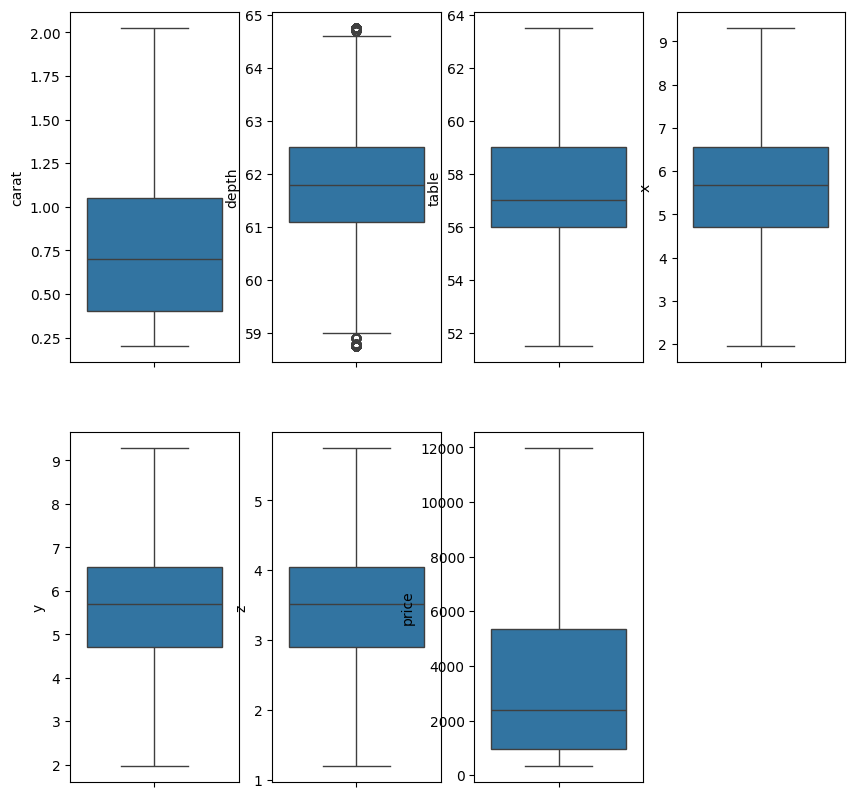

In [21]:
plt.figure(figsize=[10,10])
for i in range (data_num.shape[1]):
    plt.subplot(2,4,i+1)
    sns.boxplot(data_num.iloc[:,i]);

We can see from the above boxplots that There are outliers in all the numeric columns and especially depth has many outliers.

To get accurate modelling prediction, we can treat the outliers.

As seen from the above boxplot, we can see that the Outliers has been removed, and hence The Outlier treatment has been done and So we can proceed further for the Data modelling steps.



In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26236 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


Hence we have removed the Null vales in the data using Simple Imputer function of sklearn.



In [23]:
data_cat=data.select_dtypes(['object'])
data_cat.head(5)

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1


In [24]:
data_cat.head(5)

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1


We can see that there are Columns with Object data type, we can see that they can be encoded in a ranking based encoding method



In [25]:
print('The unique values of cut column are')
data_cat['cut'].unique()

The unique values of cut column are


array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [26]:
print('The unique values of color column are')
data_cat['color'].unique()

The unique values of color column are


array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

In [27]:
print('The unique values of clarity column are')
data_cat['clarity'].unique()

The unique values of clarity column are


array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

We can see that The Categorical vafriables have many unique values for each categorical column. So we can combine sublevels of ordinate variables to make the model easier for machine learning process.



In [28]:
#Encoding and COmbining the Ordinal data types

#Cut variable
data_cat['cut'].replace('Ideal',3,inplace=True)
data_cat['cut'].replace('Premium',3,inplace=True)
data_cat['cut'].replace('Very Good',2,inplace=True)
data_cat['cut'].replace('Good',1,inplace=True)
data_cat['cut'].replace('Fair',1,inplace=True)

data_cat['color'].replace('D',1,inplace=True)
data_cat['color'].replace('E',1,inplace=True)
data_cat['color'].replace('F',2,inplace=True)
data_cat['color'].replace('G',2,inplace=True)
data_cat['color'].replace('H',2,inplace=True)
data_cat['color'].replace('I',3,inplace=True)
data_cat['color'].replace('J',3,inplace=True)

data_cat['clarity'].replace('IF',1,inplace=True)
data_cat['clarity'].replace('VVS1',1,inplace=True)
data_cat['clarity'].replace('VVS2',1,inplace=True)
data_cat['clarity'].replace('VS1',2,inplace=True)
data_cat['clarity'].replace('VS2',2,inplace=True)
data_cat['clarity'].replace('SI1',3,inplace=True)
data_cat['clarity'].replace('SI2',3,inplace=True)
data_cat['clarity'].replace('I1',3,inplace=True)

data_cat.head(5)

/tmp/ipython-input-1869887619.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cat['cut'].replace('Ideal',3,inplace=True)
/tmp/ipython-input-1869887619.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

,cut,color,clarity
0,3,1,3
1,3,2,1
2,2,1,1
3,3,2,2
4,3,2,1


In [29]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26933 entries, 0 to 26966
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   cut      26933 non-null  int64
 1   color    26933 non-null  int64
 2   clarity  26933 non-null  int64
dtypes: int64(3)
memory usage: 841.7 KB


In [30]:
print('The number of 0 values in carat column is {}'.format(data_num[data_num['carat']==0].shape[0]))
print('The number of 0 values in depth column is {}'.format(data_num[data_num['depth']==0].shape[0]))
print('The number of 0 values in table column is {}'.format(data_num[data_num['table']==0].shape[0]))
print('The number of 0 values in x column is {}'.format(data_num[data_num['x']==0].shape[0]))
print('The number of 0 values in y column is {}'.format(data_num[data_num['y']==0].shape[0]))
print('The number of 0 values in z column is {}'.format(data_num[data_num['z']==0].shape[0]))
print('The number of 0 values in price column is {}'.format(data_num[data_num['price']==0].shape[0]))

The number of 0 values in carat column is 0
The number of 0 values in depth column is 0
The number of 0 values in table column is 0
The number of 0 values in x column is 0
The number of 0 values in y column is 0
The number of 0 values in z column is 0
The number of 0 values in price column is 0


In [31]:
np.isnan(data_num.any())

,0
carat,False
depth,False
table,False
x,False
y,False
z,False
price,False


In [32]:
data_num['x'].mean()

np.float64(5.729323135187317)

In [33]:
data_num['x'].replace(0,data_num['x'].mean(),inplace=True)
data_num['y'].replace(0,data_num['y'].mean(),inplace=True)
data_num['z'].replace(0,data_num['z'].mean(),inplace=True)

/tmp/ipython-input-459366908.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_num['x'].replace(0,data_num['x'].mean(),inplace=True)
/tmp/ipython-input-459366908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num['x'].replace(0,data_num['x'].mean(),inplace=True)
/tmp/ipython-input-459366908.py:2: FutureWarning: A value is tryi

In [34]:
data_num.head()

,carat,depth,table,x,y,z,price
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0


Hence we have removed the 0 values in the data having numeric columns with means as 0 dimensuions do not make practical sense.



In [35]:
data_cat.head(5)

,cut,color,clarity
0,3,1,3
1,3,2,1
2,2,1,1
3,3,2,2
4,3,2,1


In [36]:
data_mod=pd.concat([data_num,data_cat],axis=1)
data_mod.head(5)

,carat,depth,table,x,y,z,price,cut,color,clarity
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,3,1,3
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,3,2,1
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,2,1,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,3,2,2
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,3,2,1


We can make 2 models One without scaling and PCA an the other with Scaling of data and PCA. We can see the difference if performace of the data and choose the best model.



In [37]:
data_mod2=data_mod.copy()
data_mod2.head(5)

,carat,depth,table,x,y,z,price,cut,color,clarity
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,3,1,3
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,3,2,1
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,2,1,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,3,2,2
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,3,2,1


In [38]:
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   depth    26933 non-null  float64
 2   table    26933 non-null  float64
 3   x        26933 non-null  float64
 4   y        26933 non-null  float64
 5   z        26933 non-null  float64
 6   price    26933 non-null  float64
 7   cut      26933 non-null  int64  
 8   color    26933 non-null  int64  
 9   clarity  26933 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 2.3 MB


In [39]:
from scipy.stats import zscore
data_mod2=data_mod2.apply(zscore)
data_mod2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   depth    26933 non-null  float64
 2   table    26933 non-null  float64
 3   x        26933 non-null  float64
 4   y        26933 non-null  float64
 5   z        26933 non-null  float64
 6   price    26933 non-null  float64
 7   cut      26933 non-null  float64
 8   color    26933 non-null  float64
 9   clarity  26933 non-null  float64
dtypes: float64(10)
memory usage: 2.3 MB


We have now Scaled one of the data with Zscore technique, Now we perform PCA for the same.



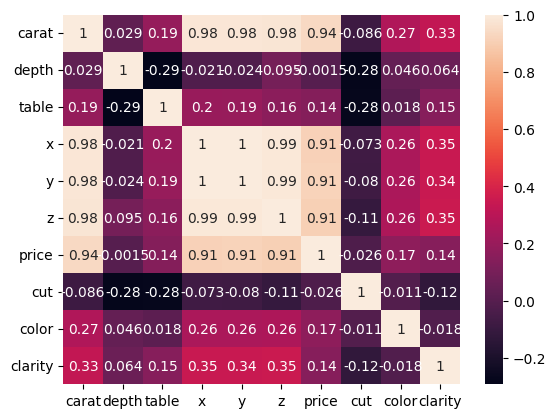

In [40]:
sns.heatmap(data_mod2.corr(),annot=True);

We can see that there is a lot of correlation between the numeric values, Hence we can use PCA to reduce Multi collinearity. As Non multi collinearity is a Assumption for Linear Regression



In [41]:
# #Confirm the statistical significance of correlations
# #H0: Correlations are not significant, H1: There are significant correlations
# #Reject H0 if p-value < 0.05
# from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
# chi_square_value,p_value=calculate_bartlett_sphericity(data_mod2)
# p_value

In [42]:
# #Confirm the adequacy of sample size.
# #Note: Above 0.7 is good, below 0.5 is not acceptable
# from factor_analyzer.factor_analyzer import calculate_kmo
# kmo_all,kmo_model=calculate_kmo(data_mod2)
# kmo_model

We can see the there are statistically significant correlation among the data present. Hence we can perform PCA analysis for dimensionality reduction

Also we can see that there is Adequate Sample size of data. Hence we can go ahead with PCA analysis to reduce Multicollinraity and DImension reduction.



In [43]:
#define predictor and response variables
x1 = data_mod[['carat', 'depth', 'table', 'x', 'y', 'z', 'cut', 'color','clarity']]
y1 = data_mod[['price']]

x2 = data_mod2[['carat', 'depth', 'table', 'x', 'y', 'z', 'cut', 'color','clarity']]
y2 = data_mod2[['price']]

In [44]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pcatest = PCA(n_components=9, random_state=123)
pca_transformed = pcatest.fit_transform(x2)

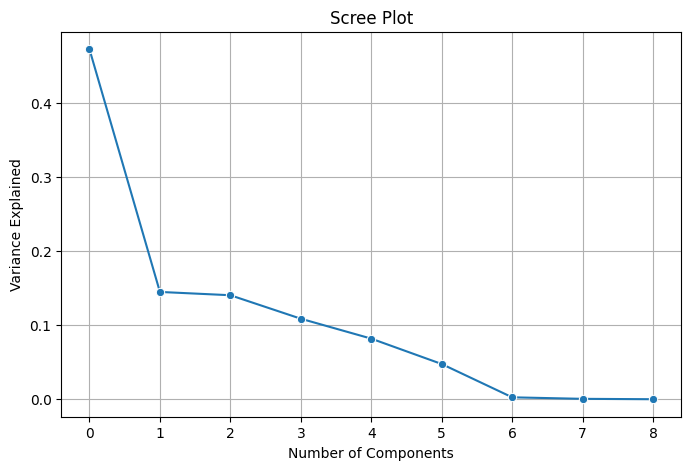

In [45]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pcatest.explained_variance_ratio_ ,x=range(0,9),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

Hence the PCA is applied and we can see from the Aboce Scree plot that 5 is the Optimal number of Component to be considered. Also it explains near 95% of the variance. Hence we use 5 components of PCA for bulding the model.



In [46]:
pca = PCA(n_components=5, random_state=123)
pca_transformed = pca.fit_transform(x2)
print(pca_transformed.shape)
x2=pd.DataFrame(pca_transformed,columns=['PC1','PC2','PC3','PC4','PC5'])

(26933, 5)


#### Hence now we have create 2 model, 1 without Scaling and PCA and the other with Scaling and PCA. And whichever model performs the best, we can consider that model for further use.



In [47]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.30 , random_state=1)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.30 , random_state=1)

from sklearn.linear_model import LinearRegression

regression_model1 = LinearRegression()
regression_model1.fit(x1_train, y1_train)

regression_model2 = LinearRegression()
regression_model2.fit(x2_train, y2_train)

LinearRegression()

In [48]:
## For model without scaling and PCA
print ('The score for Linear regression on training dataset without Scaling and PCA is {}'.format(round(regression_model1.score(x1_train, y1_train),ndigits=2)))
print ('The score for Linear regression on test dataset without Scaling and PCA is {} \n'.format(round(regression_model1.score(x1_test, y1_test),ndigits=2)))

msetr1 = np.mean((regression_model1.predict(x1_train)-y1_train)**2)
msete1 = np.mean((regression_model1.predict(x1_test)-y1_test)**2)
import math

print ('The Root means square error for Linear Regression model on Training dataset without scaling and PCA is {}'.format(round(math.sqrt(msetr1),ndigits=2)))
print ('The Root means square error for Linear Regression model on Test dataset without scaling and PCA is {}'.format(round(math.sqrt(msete1),ndigits=2)))


The score for Linear regression on training dataset without Scaling and PCA is 0.92
The score for Linear regression on test dataset without Scaling and PCA is 0.92 

The Root means square error for Linear Regression model on Training dataset without scaling and PCA is 966.42
The Root means square error for Linear Regression model on Test dataset without scaling and PCA is 968.05


In [49]:
## For model with scaling and PCA
print ('The score for Linear regression on training dataset without Scaling and PCA is {}'.format(round(regression_model2.score(x2_train, y2_train),ndigits=2)))
print ('The score for Linear regression on test dataset without Scaling and PCA is {} \n'.format(round(regression_model2.score(x2_test, y2_test),ndigits=2)))

msetr2 = np.mean((regression_model2.predict(x2_train)-y2_train)**2)
msete2 = np.mean((regression_model2.predict(x2_test)-y2_test)**2)
import math

print ('The Root means square error for Linear Regression model on Training dataset with scaling and PCA is {}'.format(round(math.sqrt(msetr2),ndigits=2)))
print ('The Root means square error for Linear Regression model on Test dataset with scaling and PCA is {}'.format(round(math.sqrt(msete2),ndigits=2)))


The score for Linear regression on training dataset without Scaling and PCA is 0.9
The score for Linear regression on test dataset without Scaling and PCA is 0.9 

The Root means square error for Linear Regression model on Training dataset with scaling and PCA is 0.32
The Root means square error for Linear Regression model on Test dataset with scaling and PCA is 0.32


We can see that The Score and the Root Means Square values for the model without Scaling and PCA permorms better than the model where Scaling and PCA is performed.



In [50]:
import statsmodels.formula.api as smf
## for train data without scaling and PCA

lm1train = smf.ols(formula= 'price~carat+ cut+color+clarity+depth+table+x+y+z',data=pd.concat([x1_train,y1_train],axis=1)).fit()
print('Below is the perfomanace parameters for Linear Reagression for Train data without Scaling and PCA\n')
print(lm1train.summary())

Below is the perfomanace parameters for Linear Reagression for Train data without Scaling and PCA

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 2.483e+04
Date:                Thu, 23 Oct 2025   Prob (F-statistic):               0.00
Time:                        20:15:14   Log-Likelihood:            -1.5634e+05
No. Observations:               18853   AIC:                         3.127e+05
Df Residuals:                   18843   BIC:                         3.128e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [51]:
lm1train = smf.ols(formula= 'price~carat+ cut+color+clarity+depth+table+x+y+z',data=pd.concat([x1_test,y1_test],axis=1)).fit()
print('Below is the perfomanace parameters for Linear Reagression for Test data without Scaling and PCA\n')
print(lm1train.summary())

Below is the perfomanace parameters for Linear Reagression for Test data without Scaling and PCA

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 1.068e+04
Date:                Thu, 23 Oct 2025   Prob (F-statistic):               0.00
Time:                        20:15:14   Log-Likelihood:                -67008.
No. Observations:                8080   AIC:                         1.340e+05
Df Residuals:                    8070   BIC:                         1.341e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [52]:
lm1train = smf.ols(formula= 'price~PC1+PC2+PC3+PC4+PC5',data=pd.concat([x2_train,y2_train],axis=1)).fit()
print('Below is the perfomanace parameters for Linear Reagression for Test data with Scaling and PCA\n')
print(lm1train.summary())

Below is the perfomanace parameters for Linear Reagression for Test data with Scaling and PCA

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     162.3
Date:                Thu, 23 Oct 2025   Prob (F-statistic):          2.85e-168
Time:                        20:15:14   Log-Likelihood:                -19721.
No. Observations:               14153   AIC:                         3.945e+04
Df Residuals:                   14147   BIC:                         3.950e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [53]:
lm1train = smf.ols(formula= 'price~PC1+PC2+PC3+PC4+PC5',data=pd.concat([x2_test,y2_test],axis=1)).fit()
print('Below is the perfomanace parameters for Linear Reagression for Test data with Scaling and PCA\n')
print(lm1train.summary())

Below is the perfomanace parameters for Linear Reagression for Test data with Scaling and PCA

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     144.6
Date:                Thu, 23 Oct 2025   Prob (F-statistic):          1.89e-139
Time:                        20:15:14   Log-Likelihood:                -4489.6
No. Observations:                3395   AIC:                             8991.
Df Residuals:                    3389   BIC:                             9028.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

From the above Results of performance parameters we can see that The R square and the Adjusted R square error is near 0.9 for the Training and Testing set when Scaling and PCA is not performed. Which is significaltly higher error than the model where Scaling and PCA is permormed.

Also we can see that RMSE for model without Scaling and PCA is near 966, while the RMSE for model with scaling and PCA is 0.32,
Which is a very huge reduction in the error.

Hence we can conslude based of Parameters, of Root Mean Square Error (RMSE), R - squared error and Adjusted R squared error,
The Model in which PCA an Scaling is performed, gives a predictions with less errors. And Hence we can consider it for future use.



## 1.4 Inference Basis on these predictions, what are the business insights and recommendations.



Summary We had first done Exploratory Data analysis to know about the and then performed data cleanng so as to remove missing/Null values in the data, treating the outliers, so as to make the data easier fo the Machine learnig model to understand.

Then 2 Linear Regression models were built, One with Scaling and PCA not applied and other model with Scaling and PCA applied.

Then the Performance measures for both were compare and there was less errors in the predictions made by the Linear Regression model in which Scaling and PCA was applied.



Business Insights and Recommendations

1. From the Coefficients on the Linear regression model, we can see that Carat variable had the most effect in predicting the Zirconia. Hence to increase profits, the carat is the area to work to make the business profitable.

2. Also we can see that the x is correlated with theprice. hence the hgiher the length, the more zirconia is needed, hencce the more the cost.

3. When using a Linear Regression model to predict the Price of Zirconia, the model built with Scaling and PCA applied tends to give better predictions with lesser errors.

4. Also The Zirconia price is Highly correlated with all dimensions also, the more the length or width or breath , the more the material needed, hence the price increases. So to get more sales numbers, larger zirconia can be sold.

5. The price of zirconia also has a mediem correlation with the clarity. The more the clarity, the higher the price of zirconia. Hence a process to increase clarity or zirconia before selling can be used to increase the prices and hence the sales and profits of the business.

